<a href="https://colab.research.google.com/github/i-bukhari/Sentiment-Analysis-Lyrics/blob/main/Baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Sentiment Analysis Models

This notebook explores baseline sentiment analysis models using VADER and TextBlob. It includes data cleaning, sentiment analysis, and evaluation of the models on a dataset of song lyrics to classify them as positive or negative based on valence scores.

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


# VADER Sentiment Analyser
VADER, which stands for Valence Aware Dictionary and sEntiment Reasoner, is a rule-based sentiment analysis tool specifically designed for analyzing sentiments in text. It assesses the sentiment of a piece of text as either positive, negative, or neutral based on a lexicon of words and their associated sentiment scores. VADER takes into account not only individual words but also their context, punctuation, capitalization, and modifiers to determine the sentiment intensity of the text. It's commonly used in natural language processing tasks, social media analysis, and sentiment analysis applications.
Ranging from -1 to 1, where -1 indicates extremely negative sentiment, 0 indicates neutral sentiment, and 1 indicates extremely positive sentiment.

# Text Blob
Another popular sentiment analysis tool in Python is TextBlob. TextBlob is a simpler, easy-to-use library that provides a wide range of natural language processing (NLP) functionalities, including sentiment analysis. TextBlob calculates sentiment polarity, which ranges from -1 (negative) to 1 (positive).

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import re
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Clean the Text

In [ ]:
df = pd.read_csv('balanced.csv') #upload csv manually!!

def clean(paragraph, words_to_remove):
    paragraph = paragraph.lower()
    paragraph = re.sub(r'\d+', '', paragraph)
    for word in words_to_remove:
        paragraph = paragraph.replace(word, "")
    paragraph = paragraph.replace(". ", ".")
    return paragraph

words_to_remove = ["[","]","-","+","verse","chorus","outro","intro",":"]

data = df.copy()
data['lyrics'] = data['lyrics'].apply(lambda x: clean(x, words_to_remove))


In [ ]:
def get_sentences(paragraph):
    # Split the paragraph into sentences based on punctuation marks
    sentences = re.split(r'[.!?]', paragraph)

    # Remove empty strings and strip whitespace from each sentence
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    return sentences

data['sentences'] = data['lyrics'].apply(get_sentences)

# VADER

In [ ]:
vader = SentimentIntensityAnalyzer()
def vader_sent(list_of_sent):
  score = []

  for sentence in list_of_sent:
    score.append(vader.polarity_scores(sentence)['compound'])

  final_score = np.mean(score)
  if final_score>=0:
    return 1
  else:
    return 0

y_pred = data['sentences'].apply(vader_sent).values

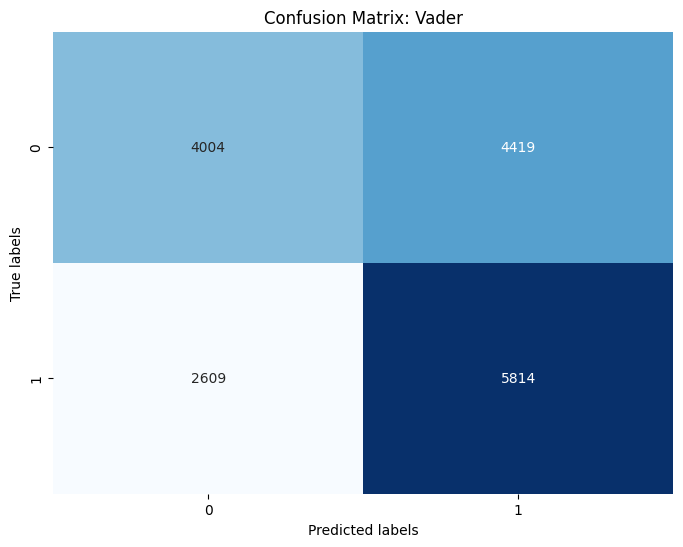

Accuracy: 0.5828089754244331
F1 Score: 0.6232847341337907


In [ ]:
y_test = data['positivity'].values
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Vader')
plt.show()

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Text Blob

In [ ]:
def blob_sent(list_of_sent):
  score = []

  for sentence in list_of_sent:
    blob = TextBlob(sentence)
    score.append(blob.sentiment.polarity)

  final_score = np.mean(score)
  if final_score>=0:
    return 1
  else:
    return 0

y_pred = data['sentences'].apply(blob_sent).values

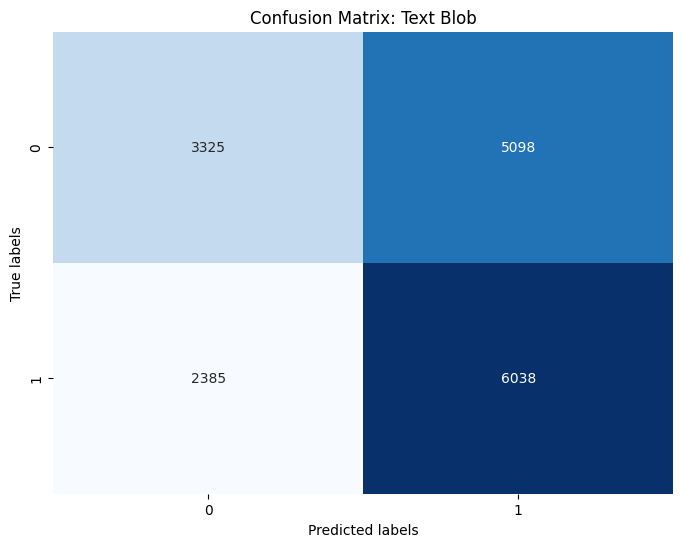

Accuracy: 0.5557995963433456
F1 Score: 0.6174139782197453


In [ ]:
y_test = data['positivity'].values
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Text Blob')
plt.show()

print("Accuracy:", accuracy)
print("F1 Score:", f1)

#ChatGPT Baseline

In [ ]:
export_GPT = pd.read_csv('updated_lyrics_with_sentiments.csv') #upload csv manually!!
export_GPT

,Lyrics,Sentiment_Score
0,[Verse 1]. From the haunts of daily life. Wher...,1
1,I was waiting for a mermaid to appear. Saying ...,1
2,[Verse 1]. I waited for you winterlong. You se...,1
3,The world is giving you the run around. It lea...,1
4,[Verse 1]. You know what they say. That everyt...,1
...,...,...
16841,If we received a warning call. Would we change...,0
16842,[Verse 1]. I know so many. Places in the world...,1
16843,I bring you death. And steal your breath. I am...,0
16844,"Close your eyes, we're coming down. Close your...",0


In [ ]:
balanced = pd.read_csv('balanced.csv') #upload csv manually!!
balanced

,valence_tags,positivity,lyrics
0,3.000000,0,[Verse 1]. From the haunts of daily life. Wher...
1,3.858696,0,I was waiting for a mermaid to appear. Saying ...
2,7.616667,1,[Verse 1]. I waited for you winterlong. You se...
3,6.685000,1,The world is giving you the run around. It lea...
4,3.240000,0,[Verse 1]. You know what they say. That everyt...
...,...,...,...
16841,7.807083,1,If we received a warning call. Would we change...
16842,5.998475,1,[Verse 1]. I know so many. Places in the world...
16843,3.160000,0,I bring you death. And steal your breath. I am...
16844,2.530000,0,"Close your eyes, we're coming down. Close your..."


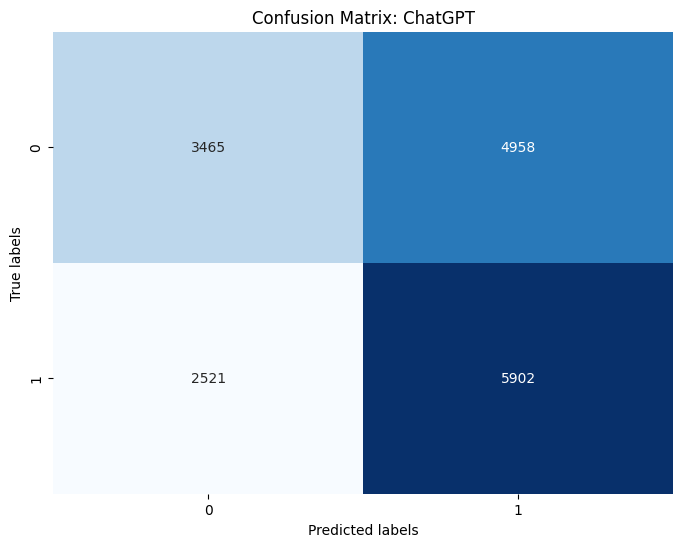

Accuracy: 0.5560370414341683
F1 Score: 0.6121454130581342


In [ ]:
y_test = balanced['positivity']
y_pred = export_GPT['Sentiment_Score']
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: ChatGPT')
plt.show()

print("Accuracy:", accuracy)
print("F1 Score:", f1)